# Testing Cloud Dev Env

In [1]:
# imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

2024-05-21 12:47:50.213338: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-21 12:47:50.227067: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-21 12:47:50.330973: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-21 12:47:52.375817: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# MNIST dataset loading and training
dataset = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = dataset.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


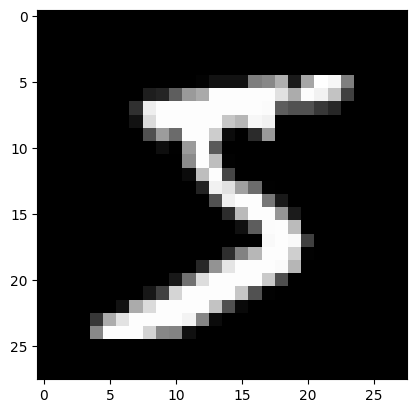

In [4]:
# display one image
plt.imshow(x_train[0], cmap='gray')

In [5]:
# model generating
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/home/Ash/.local/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# using adam
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
# training
# see training time and store it
start_time = time.time()
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
end_time = time.time()
print("Training time: ", end_time - start_time)

Epoch 1/10
  30/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9060 - loss: 0.3020

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9215 - loss: 0.3118 - val_accuracy: 0.9165 - val_loss: 0.3733
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9305 - loss: 0.2754 - val_accuracy: 0.9283 - val_loss: 0.3093
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9406 - loss: 0.2362 - val_accuracy: 0.9393 - val_loss: 0.2777
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9492 - loss: 0.2033 - val_accuracy: 0.9467 - val_loss: 0.2406
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9520 - loss: 0.1980 - val_accuracy: 0.9420 - val_loss: 0.2572
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9533 - loss: 0.1946 - val_accuracy: 0.9457 - val_loss: 0.2544
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9570 - loss: 0.1720 - val_accuracy: 0.9488 - val_loss: 0.2726
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9592 - loss: 0.1692 - val_acc

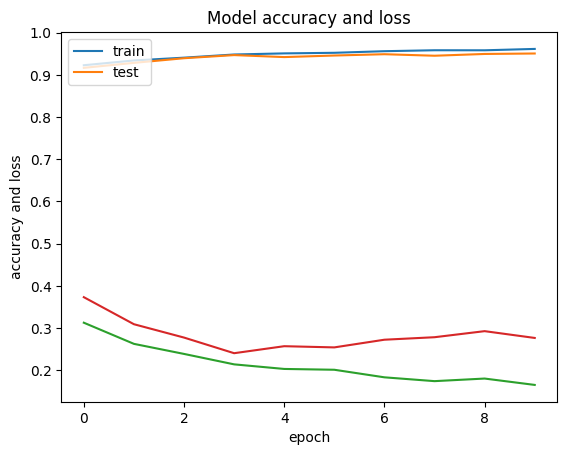

In [12]:
# model accuracy and loss plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Questions on Model Training
Relation between loss and accuracy?
And relation between different loss sizes - how they represent different signals?

Does scaling change things?
Hmm

    ## Available GPUs
gcloud compute accelerator-types list --zone=us-central1-a

## GPU Things
gcloud compute instances stop test-instance --zone=INSTANCE_ZONE
gcloud compute instances update INSTANCE_NAME --zone=INSTANCE_ZONE --accelerator type=nvidia-tesla-k80,count=1
gcloud compute instances start INSTANCE_NAME --zone=INSTANCE_ZONE

In [ ]:
# enabling GPU, training again and turning off GPU
# running GPU enabling in shell
# has to be done via gcloud cli outside of this

In [ ]:
# checking GPU availability
physical_devices = tf.config.experimental.list_physical_devices('GPU')

In [ ]:
# model generating
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/home/Ash/.local/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# using adam
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# training
# see training time and store it
start_time = time.time()
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
end_time = time.time()
print("Training time: ", end_time - start_time)

Epoch 1/10
  30/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9060 - loss: 0.3020

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9215 - loss: 0.3118 - val_accuracy: 0.9165 - val_loss: 0.3733
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9305 - loss: 0.2754 - val_accuracy: 0.9283 - val_loss: 0.3093
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9406 - loss: 0.2362 - val_accuracy: 0.9393 - val_loss: 0.2777
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9492 - loss: 0.2033 - val_accuracy: 0.9467 - val_loss: 0.2406
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9520 - loss: 0.1980 - val_accuracy: 0.9420 - val_loss: 0.2572
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9533 - loss: 0.1946 - val_accuracy: 0.9457 - val_loss: 0.2544
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9570 - loss: 0.1720 - val_accuracy: 0.9488 - val_loss: 0.2726
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9592 - loss: 0.1692 - val_acc

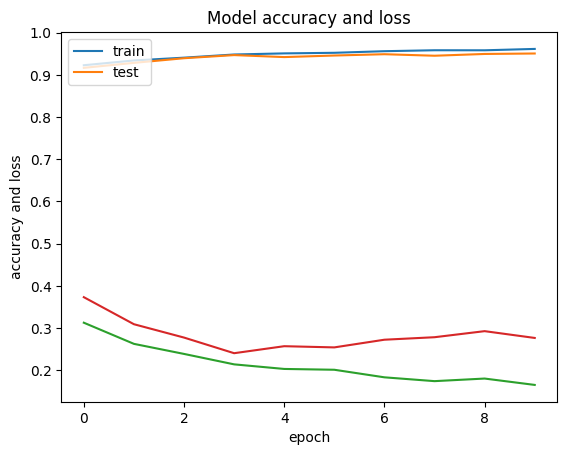

In [ ]:
# model accuracy and loss plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()